In [6]:
%matplotlib inline
import pandas as pd

In [3]:
db_df = pd.read_csv("db.csv")
s_df = pd.read_csv("shilldb.csv")

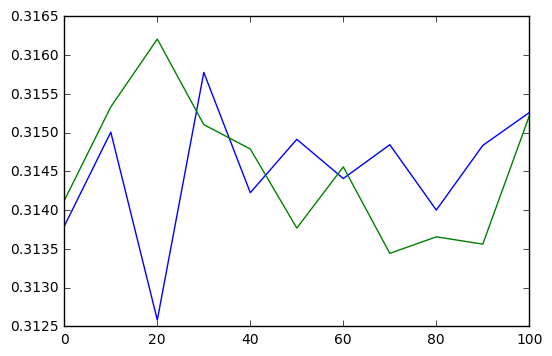

In [12]:
db_df.mean()[1:].plot()
s_df.mean()[1:].plot()